In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


In [3]:
cov_data = np.cov(v)/N

## initialize

In [4]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 2
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b= [0. 0.]


## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


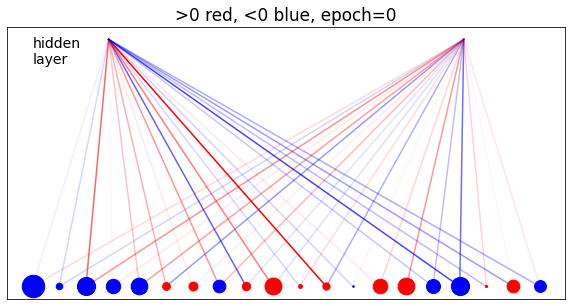

In [5]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [6]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 4
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
act= [-0.26465979  1.34505401]
prob= [0.43421858 0.79331984]
output= [0 0]


array([0, 0])

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as  $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j\leq i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [7]:
s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
vtest = np.array([0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0])
print(vtest)
htest = np.array([0, 0])  


def activate_back(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(w[i:i+4,:],h)
                e[j]+= np.dot(local_f,v[i:i+4])
    bol = exp(-e)
    p = bol/bol.sum()
    #print(p)
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
            
    for i in range(0,3):
        if k == 500*i and steps==1:
            print('----initiating backward CD: k = ',k,'----')
            print('WEIGHTS[0] : ', w.T[0])
            print('EVALUATED ENERGIES = ',e, '\n') 
            print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
    return(vf,cprob)

vf, cprob = activate_back(vtest,htest,w,a,1,1)
print(vf)
print(cprob)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
[0.21038277 0.49560682 0.63267459 1.        ]


## Energies

In [8]:
def E(v,h):
    ene = -(np.dot((np.dot(v,w)).T,h))-np.dot(a.T,v)-np.dot(b.T,h)
    return ene

# Training with ADAM +RMS

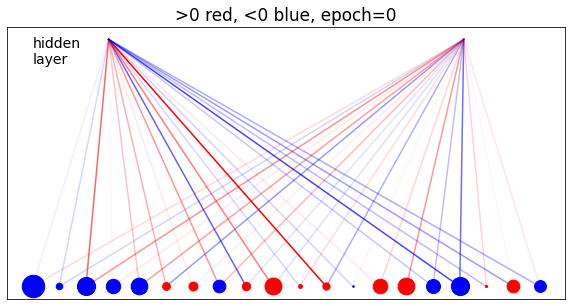

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-8.72876393e-02 -2.21489412e-01  8.38211653e-01  3.96160518e-02
  3.27912325e-01  4.29466985e-01  1.17256826e-01  5.76885677e-01
 -8.53501017e-01  7.11674783e-01 -2.30146526e-01  1.38535434e+00
 -2.46070853e-01  1.29034856e-01  4.00935791e-04 -3.04256178e-01
 -1.01067017e+00 -3.67028188e-01 -5.39796281e-01 -4.53483232e-01]
EVALUATED ENERGIES =  [-0.73538148  0.          1.00398512 -0.6605412 ] 

PROBABILITY :  [0.38716983 0.18557924 0.06799926 0.35925167] 

CUMULATIVE PROBABILITY :  [0.38716983 0.57274907 0.64074833 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.08528764 -0.22348941  0.83621165  0.03761605  0.32991232  0.42746699
  0.11525683  0.57888568 -0.85150102  0.70967478 -0.23214653  1.38335434
 -0.24407085  0.12703486 -0.00159906 -0.30225618 -1.00867017 -0.36902819
 -0.54179628 -0.45548323]
EVALUATED ENERGIES =  [-0.44080324  0.          0.92163815 -1.0893472 ] 

PROBABILITY :  [0.26230829 0.1688

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [ 0.07467902 -0.33343743  0.67757124 -0.05301167  0.37990005  0.26538693
  0.00800655  0.71432954 -0.69012096  0.58483774 -0.38503026  1.29810817
 -0.22897759 -0.03698526 -0.10095212 -0.12118136 -0.8449598  -0.45651689
 -0.70277059 -0.57149724]
EVALUATED ENERGIES =  [-0.30292003  0.          0.         -0.46783425] 

PROBABILITY :  [0.27347747 0.20200637 0.20200637 0.32250979] 

CUMULATIVE PROBABILITY :  [0.27347747 0.47548384 0.67749021 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.09410742 -0.33334409  0.66059827 -0.05721661  0.37699468  0.2458281
  0.01176135  0.74434348 -0.66951317  0.58181774 -0.40085309  1.29036505
 -0.24144823 -0.05309393 -0.09503061 -0.09553591 -0.82420879 -0.44794364
 -0.72210325 -0.58119134]
EVALUATED ENERGIES =  [ 0.87607247  0.98874362 -0.51377635  0.69362168] 

PROBABILITY :  [0.14068967 0.1256984  0.56476252 0.16884942] 

CUMULATIVE PROBABILITY :  [0.14068967 0.26638806 0.

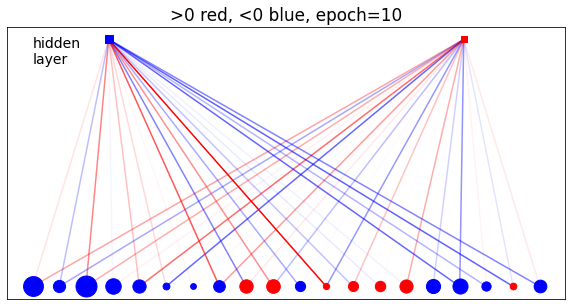

l_rate =  0.9090909090909092
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.13678621 -0.32854809  0.60836101 -0.05046987  0.31278523  0.18762225
  0.04552622  0.84291439 -0.62791721  0.56283919 -0.43096665  1.27094372
 -0.30307144 -0.1075901  -0.07106792 -0.0048201  -0.76686645 -0.37720572
 -0.79246478 -0.62094715]
EVALUATED ENERGIES =  [ 0.         -0.72114744  0.          0.        ] 

PROBABILITY :  [0.19775384 0.40673849 0.19775384 0.19775384] 

CUMULATIVE PROBABILITY :  [0.19775384 0.60449233 0.80224616 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.13701862 -0.32898292  0.60806731 -0.04993744  0.31174129  0.18715637
  0.04591823  0.84404597 -0.62796369  0.56240594 -0.43083416  1.27112938
 -0.30421386 -0.10796189 -0.07079602 -0.0037247  -0.76654457 -0.37661584
 -0.79291145 -0.62121857]
EVALUATED ENERGIES =  [-0.2747308   0.         -0.08076493 -0.0955148 ] 

PROBABILITY :  [0.29245    0.22219667 0.24088697 0.24446636] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [ 0.10890565 -0.34373106  0.58717833  0.01693299  0.20138944  0.12920557
  0.10980046  0.94640352 -0.66247603  0.49946969 -0.41359345  1.31843811
 -0.43000387 -0.14056904 -0.02904065  0.08087472 -0.75117963 -0.29336899
 -0.84741149 -0.65016022]
EVALUATED ENERGIES =  [ 0.         -0.76440429 -0.11559773  0.        ] 

PROBABILITY :  [0.189744   0.40751596 0.21299603 0.189744  ] 

CUMULATIVE PROBABILITY :  [0.189744   0.59725996 0.810256   1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.09833732 -0.33726406  0.58785622  0.03253927  0.18410417  0.12067547
  0.13106207  0.96272088 -0.67168229  0.49118113 -0.40496703  1.33173866
 -0.45273846 -0.14497994 -0.01312361  0.09822947 -0.7524072  -0.27351531
 -0.8510264  -0.65428963]
EVALUATED ENERGIES =  [ 0.         -0.49190242  0.0122464   0.08053302] 

PROBABILITY :  [0.21997954 0.35975994 0.21730201 0.2029585 ] 

CUMULATIVE PROBABILITY :  [0.21997954 0.57973948 0

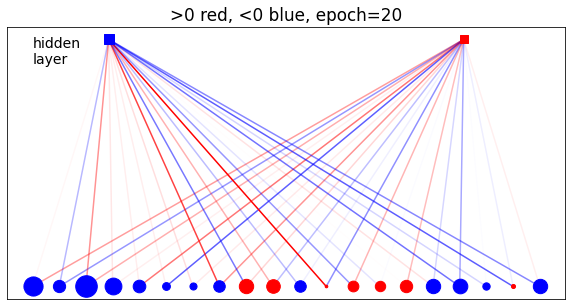

l_rate =  0.8333333333333337
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.04206877 -0.38722097  0.58813757  0.13408287  0.09267999  0.09022704
  0.17767833  1.02386207 -0.73215515  0.42367213 -0.36192762  1.38521142
 -0.56548927 -0.15253385  0.01323146  0.15898827 -0.76577066 -0.23220128
 -0.88052689 -0.65186765]
EVALUATED ENERGIES =  [ 0.          0.         -0.20161351  0.        ] 

PROBABILITY :  [0.23677745 0.23677745 0.28966764 0.23677745] 

CUMULATIVE PROBABILITY :  [0.23677745 0.47355491 0.76322255 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.04105888 -0.38773585  0.58832838  0.13523942  0.09133294  0.08973272
  0.17838554  1.02480673 -0.73356079  0.42321102 -0.36145604  1.38618308
 -0.56692846 -0.15266198  0.01342983  0.15990962 -0.76563218 -0.23198538
 -0.88123021 -0.65153606]
EVALUATED ENERGIES =  [ 1.78654382  0.67924905  0.         -1.66447343] 

PROBABILITY :  [0.02408049 0.07287142 0.14373131 0.75931678] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-0.06975503 -0.42480714  0.60675687  0.25870667 -0.05104898  0.02867635
  0.27677982  1.12998062 -0.84259739  0.3195554  -0.28088669  1.47845716
 -0.71125677 -0.19077572  0.08578302  0.2598582  -0.78478323 -0.18039242
 -0.92740314 -0.63365227]
EVALUATED ENERGIES =  [-0.64812624  0.61328578 -0.89474804  0.42886639] 

PROBABILITY :  [0.34440395 0.09755372 0.44073203 0.11731031] 

CUMULATIVE PROBABILITY :  [0.34440395 0.44195767 0.88268969 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.0891178  -0.43554193  0.61239419  0.2911446  -0.07498198  0.02105578
  0.29503874  1.15259176 -0.87056065  0.2990643  -0.25766294  1.50621274
 -0.73345257 -0.18917517  0.09156322  0.2800947  -0.79388293 -0.16570387
 -0.92917577 -0.62676665]
EVALUATED ENERGIES =  [ 1.49297126  0.          0.08960298 -0.25920352] 

PROBABILITY :  [0.065418   0.29112966 0.26617813 0.37727421] 

CUMULATIVE PROBABILITY :  [0.065418   0.35654766 0

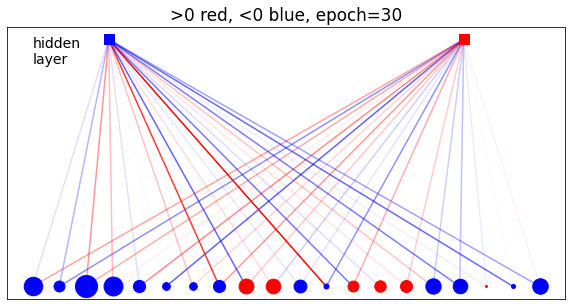

l_rate =  0.7692307692307697
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.19611849 -0.47673205  0.66029941  0.41496521 -0.18838542 -0.02673519
  0.38758631  1.25837777 -0.98653272  0.2131068  -0.15556221  1.61205858
 -0.85096529 -0.21560077  0.16204408  0.38645505 -0.83304539 -0.09949185
 -0.94694366 -0.59404761]
EVALUATED ENERGIES =  [-0.46927024 -0.44786207 -0.23683061 -0.42604169] 

PROBABILITY :  [0.26816054 0.26248073 0.2125434  0.25681533] 

CUMULATIVE PROBABILITY :  [0.26816054 0.53064127 0.74318467 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.19746163 -0.47752714  0.6609508   0.41679196 -0.18973803 -0.02709264
  0.38869208  1.25950639 -0.98758967  0.21145787 -0.15399757  1.61342445
 -0.85234442 -0.21588886  0.16307391  0.38766418 -0.83335391 -0.09951628
 -0.94664885 -0.59358679]
EVALUATED ENERGIES =  [ 0.          0.          0.02469265 -0.28094392] 

PROBABILITY :  [0.23255873 0.23255873 0.22688656 0.30799598] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-0.34302087 -0.57475974  0.71721351  0.5741739  -0.36534367 -0.11043505
  0.509169    1.39836199 -1.12428178  0.05927522 -0.00512434  1.7178464
 -1.02135946 -0.28720433  0.2560881   0.53310108 -0.90101479 -0.0699062
 -0.96458629 -0.54429395]
EVALUATED ENERGIES =  [-0.87767739  0.          0.          0.47863875] 

PROBABILITY :  [0.47867438 0.19900763 0.19900763 0.12331036] 

CUMULATIVE PROBABILITY :  [0.47867438 0.67768201 0.87668964 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.36914403 -0.59278734  0.72904067  0.60817022 -0.39766646 -0.12737605
  0.53893404  1.42717438 -1.15013861  0.03699871  0.02428037  1.73807416
 -1.05057911 -0.30045388  0.27700761  0.5626304  -0.91409158 -0.0618999
 -0.96404773 -0.53298403]
EVALUATED ENERGIES =  [ 0.         -1.0798071   0.38661606  0.24151067] 

PROBABILITY :  [0.18488034 0.54430836 0.12559881 0.14521249] 

CUMULATIVE PROBABILITY :  [0.18488034 0.7291887  0.85

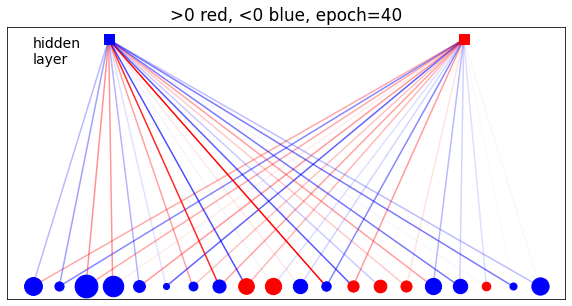

l_rate =  0.7142857142857149
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.50019802 -0.68229799  0.79234614  0.75694405 -0.53554852 -0.20945704
  0.66750977  1.54665733 -1.27050608 -0.08005832  0.16225691  1.82999118
 -1.17866941 -0.38326396  0.38547281  0.69184098 -0.96862827 -0.05530535
 -0.9607987  -0.47460195]
EVALUATED ENERGIES =  [ 0.          0.28313222 -0.68452966  0.27091945] 

PROBABILITY :  [0.22227472 0.16746626 0.44073499 0.16952403] 

CUMULATIVE PROBABILITY :  [0.22227472 0.38974098 0.83047597 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.50187259 -0.6830178   0.79316569  0.7586396  -0.53733347 -0.21056391
  0.66912013  1.54836589 -1.27205124 -0.08140075  0.16374829  1.83139668
 -1.18021026 -0.38454935  0.38677315  0.69375421 -0.96925582 -0.05511434
 -0.96070157 -0.47394471]
EVALUATED ENERGIES =  [ 0.          0.08912997  0.         -0.55952272] 

PROBABILITY :  [0.21438232 0.19610122 0.21438232 0.37513414] 

CUMULATIVE PROBABILITY

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-0.66760095 -0.77880792  0.87079618  0.93913239 -0.72488934 -0.34056813
  0.85233948  1.7205298  -1.43237685 -0.22800142  0.33988428  1.95527111
 -1.35762011 -0.50703354  0.5367883   0.87519876 -1.05966819 -0.05324029
 -0.9390583  -0.3834277 ]
EVALUATED ENERGIES =  [ 1.72073266 -0.20873279 -0.13925617 -2.45949815] 

PROBABILITY :  [0.01254856 0.08640721 0.08060773 0.8204365 ] 

CUMULATIVE PROBABILITY :  [0.01254856 0.09895577 0.1795635  1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.69758659 -0.79901364  0.88883957  0.96616523 -0.76102518 -0.36539744
  0.88747839  1.74886858 -1.45789711 -0.25709057  0.36565117  1.97909825
 -1.38692439 -0.5333338   0.56239687  0.90602563 -1.07835945 -0.05327603
 -0.93626504 -0.36851439]
EVALUATED ENERGIES =  [0.        0.5821674 0.1331709 0.       ] 

PROBABILITY :  [0.29120545 0.16269245 0.25489664 0.29120545] 

CUMULATIVE PROBABILITY :  [0.29120545 0.45389791 0.7087945

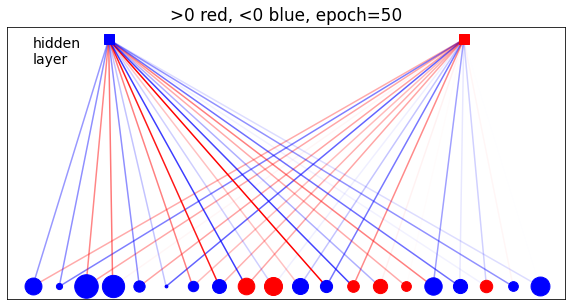

l_rate =  0.6666666666666671
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.83597903 -0.91005213  0.98167147  1.09304833 -0.90881357 -0.48319918
  1.02717199  1.8779172  -1.57609439 -0.39408548  0.50363464  2.0693772
 -1.5276055  -0.6492831   0.68843812  1.03752648 -1.16711063 -0.11416705
 -0.89315594 -0.28128872]
EVALUATED ENERGIES =  [ 2.30547386 -0.59261151  0.          0.        ] 

PROBABILITY :  [0.025512   0.46277191 0.25585805 0.25585805] 

CUMULATIVE PROBABILITY :  [0.025512   0.48828391 0.74414195 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.83763979 -0.911049    0.98296363  1.09451584 -0.91074247 -0.48456909
  1.02892009  1.87976912 -1.57751871 -0.39577296  0.50535182  2.07078394
 -1.52935568 -0.65082255  0.69032689  1.03928199 -1.16840845 -0.11477205
 -0.89239064 -0.27997302]
EVALUATED ENERGIES =  [ 1.13082031 -0.49086873  0.         -1.02733107] 

PROBABILITY :  [0.05613262 0.28412271 0.17390992 0.48583475] 

CUMULATIVE PROBABILITY 

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-0.98649502 -1.0581746   1.10636629  1.25215387 -1.08931789 -0.63622462
  1.21497797  2.04611259 -1.72361837 -0.55444216  0.68166644  2.19058897
 -1.69927309 -0.82235434  0.8710409   1.22017642 -1.28247113 -0.19873814
 -0.82019486 -0.14848072]
EVALUATED ENERGIES =  [ 4.24095615 -1.06421362  0.          0.        ] 

PROBABILITY :  [0.00292977 0.58998305 0.20354359 0.20354359] 

CUMULATIVE PROBABILITY :  [0.00292977 0.59291282 0.79645641 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.01233431 -1.08416042  1.12864771  1.27820388 -1.12023857 -0.66497804
  1.24870866  2.07419888 -1.75093403 -0.5837815   0.71197738  2.21412872
 -1.72723194 -0.85177623  0.8980235   1.25143771 -1.30317154 -0.21677079
 -0.80285616 -0.12812573]
EVALUATED ENERGIES =  [ 0.21662534  1.19907299  0.         -3.06099875] 

PROBABILITY :  [0.03433007 0.01285296 0.04263379 0.91018318] 

CUMULATIVE PROBABILITY :  [0.03433007 0.04718303 0

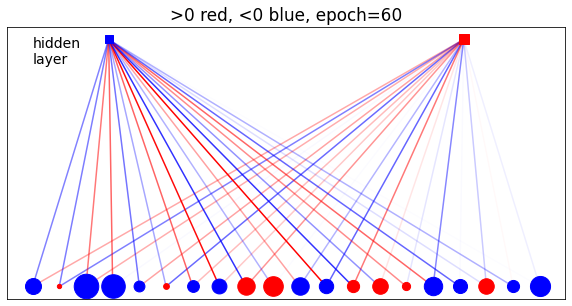

l_rate =  0.6250000000000006
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.12889053 -1.17250264  1.22246183  1.39795644 -1.26100213 -0.79228817
  1.40066529  2.21122111 -1.85764717 -0.70574178  0.85061492  2.30825361
 -1.85831581 -0.98981325  1.04922616  1.39064222 -1.38591937 -0.30687487
 -0.712605   -0.02690611]
EVALUATED ENERGIES =  [0.         0.         1.35536022 0.29854898] 

PROBABILITY :  [0.3333613  0.3333613  0.08595868 0.24731873] 

CUMULATIVE PROBABILITY :  [0.3333613  0.6667226  0.75268127 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-1.130207   -1.17361311  1.22380894  1.39929636 -1.26267654 -0.79402493
  1.40290385  2.2127605  -1.85887973 -0.70721309  0.85234548  2.30941128
 -1.85988504 -0.99168627  1.05125449  1.39242206 -1.38701149 -0.30822128
 -0.71145443 -0.025238  ]
EVALUATED ENERGIES =  [ 0.         -0.00513686 -1.1199453   1.57159086] 

PROBABILITY :  [0.18948182 0.19045767 0.58070239 0.03935812] 

CUMULATIVE PROBABILITY :  

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-1.26595942 -1.29762247  1.34553603  1.53947377 -1.42915948 -0.96662643
  1.58959872  2.37896946 -1.98645831 -0.85874694  1.01404377  2.4273581
 -2.02667483 -1.1646704   1.22790525  1.56845061 -1.49487336 -0.44106727
 -0.57651076  0.0956987 ]
EVALUATED ENERGIES =  [ 3.97731599  0.         -1.19671412  0.        ] 

PROBABILITY :  [0.00351652 0.18768906 0.62110537 0.18768906] 

CUMULATIVE PROBABILITY :  [0.00351652 0.19120557 0.81231094 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.29159388 -1.32308411  1.36917169  1.56361625 -1.45835351 -0.99498969
  1.62121342  2.40445207 -2.01155982 -0.88772708  1.04281539  2.44927424
 -2.05641888 -1.19490886  1.25906258  1.59657225 -1.51760447 -0.46856245
 -0.55100811  0.11829891]
EVALUATED ENERGIES =  [2.47382481 1.29800009 0.         0.        ] 

PROBABILITY :  [0.03574452 0.11584135 0.42420707 0.42420707] 

CUMULATIVE PROBABILITY :  [0.03574452 0.15158587 0.5757

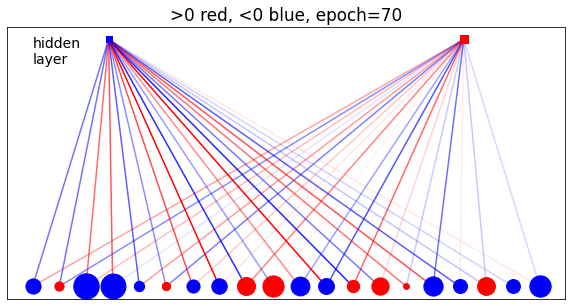

l_rate =  0.5882352941176475
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.40220482 -1.42166332  1.47423672  1.66192901 -1.59150897 -1.13282971
  1.76967507  2.52559734 -2.1194549  -1.00936438  1.16745074  2.54226015
 -2.18935712 -1.33326715  1.4016505   1.72400221 -1.62063723 -0.5901805
 -0.44649851  0.23342436]
EVALUATED ENERGIES =  [-2.1749554   0.         -0.98679633  2.46525128] 

PROBABILITY :  [0.70025522 0.07955825 0.21342507 0.00676146] 

CUMULATIVE PROBABILITY :  [0.70025522 0.77981348 0.99323854 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-1.403536   -1.42283824  1.47545197  1.66306131 -1.59320576 -1.13440695
  1.77139211  2.52705901 -2.12076742 -1.01080232  1.16889202  2.54333053
 -2.19106745 -1.33488669  1.40309081  1.72573519 -1.62204125 -0.59186414
 -0.44501666  0.2348192 ]
EVALUATED ENERGIES =  [ 3.83527422  0.         -0.73605665  0.        ] 

PROBABILITY :  [0.00525528 0.2433515  0.50804172 0.2433515 ] 

CUMULATIVE PROBABILITY 

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-1.52271638 -1.52960209  1.58591499  1.77679713 -1.72295885 -1.26285235
  1.90202962  2.65319442 -2.23494553 -1.12892589  1.29106427  2.64421179
 -2.32249296 -1.46449119  1.53291843  1.85500513 -1.73344163 -0.70801999
 -0.32532834  0.33800071]
EVALUATED ENERGIES =  [3.11458868 0.54343477 0.         0.        ] 

PROBABILITY :  [0.01691211 0.22122575 0.38093107 0.38093107] 

CUMULATIVE PROBABILITY :  [0.01691211 0.23813786 0.61906893 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.54209818 -1.54712859  1.60355645  1.79384753 -1.74291143 -1.28310296
  1.92159834  2.67244275 -2.25564711 -1.14912291  1.31088271  2.65996216
 -2.3416828  -1.48649178  1.55235772  1.87526788 -1.75177406 -0.72815863
 -0.30815412  0.35385893]
EVALUATED ENERGIES =  [-0.60263811  3.43130253 -0.1810133   0.        ] 

PROBABILITY :  [0.45023745 0.0079712  0.29534681 0.24644455] 

CUMULATIVE PROBABILITY :  [0.45023745 0.45820864 0.753

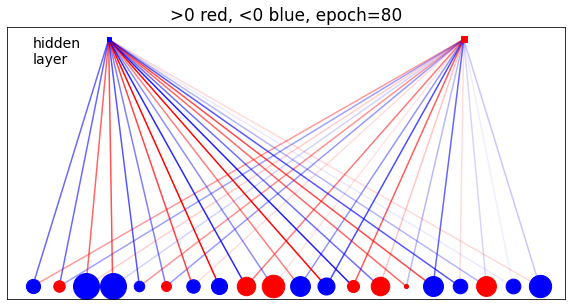

l_rate =  0.555555555555556
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.63030838 -1.62932109  1.67850534  1.87253518 -1.83215371 -1.37205894
  2.00926986  2.75870833 -2.33579988 -1.23560462  1.39569909  2.72414086
 -2.43102851 -1.57391467  1.63990798  1.9608909  -1.83081634 -0.81330623
 -0.22774375  0.42409416]
EVALUATED ENERGIES =  [0.        0.        0.        5.8305078] 

PROBABILITY :  [0.33300737 0.33300737 0.33300737 0.0009779 ] 

CUMULATIVE PROBABILITY :  [0.33300737 0.66601473 0.9990221  1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-1.63115525 -1.63073895  1.67826784  1.87380035 -1.83335879 -1.37303805
  2.01001439  2.75971253 -2.33688812 -1.23649109  1.39619405  2.72472431
 -2.43233088 -1.57515012  1.64097636  1.96194117 -1.83133294 -0.81496694
 -0.22647949  0.42397886]
EVALUATED ENERGIES =  [0.         0.         2.21186561 0.97269075] 

PROBABILITY :  [0.40200026 0.40200026 0.04401749 0.15198198] 

CUMULATIVE PROBABILITY :  [0.402000

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-1.73614017 -1.72879069  1.77530532  1.97218813 -1.94297157 -1.48273311
  2.11894137  2.86698085 -2.43983496 -1.34225138  1.50311725  2.80915718
 -2.54076642 -1.68419226  1.7484063   2.07023205 -1.92920952 -0.91328761
 -0.12457869  0.51575191]
EVALUATED ENERGIES =  [0.         0.         2.00320655 0.        ] 

PROBABILITY :  [0.31898924 0.31898924 0.04303229 0.31898924] 

CUMULATIVE PROBABILITY :  [0.31898924 0.63797847 0.68101076 1.        ] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.75575792 -1.74681732  1.79352454  1.99232548 -1.96150529 -1.50190872
  2.13812273  2.88606582 -2.45775729 -1.36087225  1.52082971  2.82682576
 -2.55996249 -1.70352699  1.7681082   2.08978459 -1.94583207 -0.93266702
 -0.10588256  0.53235988]
EVALUATED ENERGIES =  [ 1.8764505   2.48798705 -0.07742154  0.        ] 

PROBABILITY :  [0.06609928 0.03585996 0.46639363 0.43164713] 

CUMULATIVE PROBABILITY :  [0.06609928 0.10195925 0.568

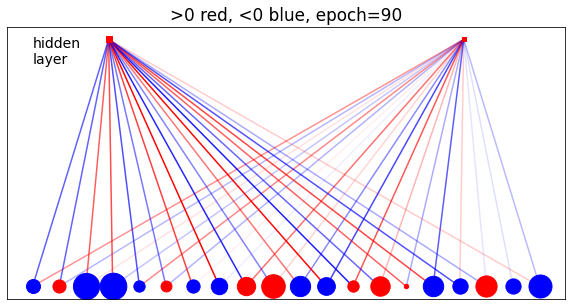

l_rate =  0.5263157894736847
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-1.83803864 -1.82104987  1.87274491  2.06778057 -2.04610559 -1.58602891
  2.22237618  2.96868519 -2.53574079 -1.44278435  1.60308179  2.89505782
 -2.64332963 -1.78810422  1.85260411  2.17169528 -2.02269161 -1.01301976
 -0.02734925  0.60196963]
EVALUATED ENERGIES =  [0.         0.         0.         6.67847029] 

PROBABILITY :  [0.33319365 0.33319365 0.33319365 0.00041906] 

CUMULATIVE PROBABILITY :  [0.33319365 0.66638729 0.99958094 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-1.83894311 -1.82137162  1.87330054  2.06848746 -2.04702768 -1.58711909
  2.22325169  2.96974842 -2.53676783 -1.44390368  1.60370838  2.89658023
 -2.64447808 -1.78904889  1.85347262  2.17283902 -2.02389561 -1.01352346
 -0.02688768  0.60294659]
EVALUATED ENERGIES =  [2.26900312 3.77647457 0.         0.        ] 

PROBABILITY :  [0.04863581 0.01077134 0.47029643 0.47029643] 

CUMULATIVE PROBABILITY :  [0.0

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-1.93928926 -1.91842346  1.96592575  2.1590233  -2.15038424 -1.68986045
  2.32557219  3.07019353 -2.63444215 -1.54307331  1.70189256  2.97636928
 -2.74794061 -1.8919805   1.95572384  2.27395602 -2.12145902 -1.11161969
  0.06979294  0.68958766]
EVALUATED ENERGIES =  [ 2.82587833  0.8607345  -1.11350638  0.        ] 

PROBABILITY :  [0.01308923 0.09340396 0.67261605 0.22089076] 

CUMULATIVE PROBABILITY :  [0.01308923 0.1064932  0.77910924 1.        ] 


----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [-1.94034093 -1.91908529  1.96794668  2.15972294 -2.15138483 -1.69064649
  2.32684797  3.07135521 -2.63611533 -1.54337075  1.70343049  2.9775552
 -2.74884935 -1.89266722  1.95658149  2.27539545 -2.1227317  -1.11181437
  0.0716055   0.6902306 ]
EVALUATED ENERGIES =  [0.         5.05325628 0.         0.        ] 

PROBABILITY :  [0.33262501 0.00212497 0.33262501 0.33262501] 

CUMULATIVE PROBABILITY :  [0.33262501 0.33474998 0.66

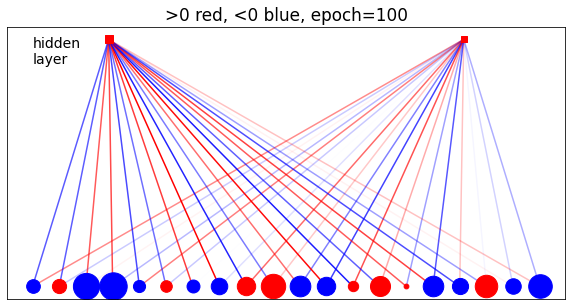

l_rate =  0.5000000000000009


In [43]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)
N = 10000
Nv = 20
epochs = 100

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0

beta=0.9

t=1

#covariance
cov_sum = np.zeros(epochs)

#energies
E_rbm = np.zeros(epochs)
E_d = np.zeros(epochs)

V = []

# minibatch
mini, m = 500, 0
steps=3
# train model
print('===================================================')
for epoch in range(epochs):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        vf = v[k]
        for i in range(steps):
            vf,_ = activate_back(vf,hf,w,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
        
        V.append(vf)
        
        
        # update energies of the state for each row
        E_rbm[epoch] += E(vf,h)
        E_d[epoch] += E(v[k],h)
    
        m += 1
        # minibatch
        
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       
            db = l_rate_m*(h_data - h_model)
            
            if epoch<=70: #ADAM
                ##********update***********##
                m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
                m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
                m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

                ## rms beta 2
                v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
                v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
                v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

                ## bias correction
                m_dw_corr = m_dw/(1-beta1**t)
                m_db_corr = m_db/(1-beta1**t)
                m_da_corr = m_da/(1-beta1**t)

                v_dw_corr = v_dw/(1-beta2**t)
                v_db_corr = v_db/(1-beta2**t)
                v_da_corr = v_da/(1-beta2**t)
            
                ## update weights and biases
                w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
                b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
                a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
                m=0
                t=t+1 #update the time
                
            else: #RMSprop
                v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
                v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
                v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)
                w = w - l_rate_m*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
                b = b - l_rate_m*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
                a = a - l_rate_m*((v_data - v_model)/(np.sqrt(v_da+epsilon)))

                m=0
            
            if epoch%10==9 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                print('vh_data \n', vh_data, '\n')
                print('vh_model \n',vh_model)

    Vf = np.array(V)
    cov_vf = np.cov(Vf)
    #covariance:
    for j in range(0,N):
        for i in range(0, j):
            cov_sum[epoch]+=(cov_vf[i,j]-cov_data[i,j])**2
    cov_sum[epoch] = (cov_sum[epoch]*2)/(Nv*(Nv-1))
        
    #print('E_rbm = ', E_rbm)
    #print('E_data = ', E_d)
    # randomize the order of input data
    np.random.shuffle(v)
    V = []
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


In [44]:
print(Vf)
np.savetxt('Vf_ADrms',Vf)
np.savetxt('E_d_ADrms',E_d)
np.savetxt('E_rbm_ADrms',E_rbm)
np.savetxt('2mom_ADrms',cov_sum)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [12]:
Vf_AR = np.loadtxt('Vf_ADrms.txt')
E_d_AR = np.loadtxt('E_d_ADrms.txt')
E_rbm_AR = np.loadtxt('E_rbm_ADrms.txt')
mom_AR = np.loadtxt('2mom_ADrms.txt')
epochs = 100

In [13]:
l_rate = 1.0
l_tot = np.zeros(100)
for i in range(100):
    l_tot[i]=l_rate
    l_rate = l_rate / (0.01 * l_rate + 1)

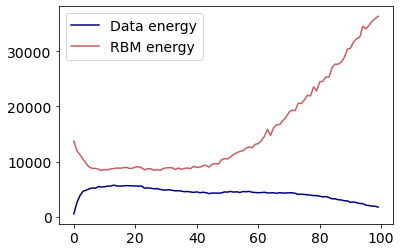

In [14]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_d_AR, label='Data energy', color='navy')
ax.plot(np.arange(epochs), E_rbm_AR, label='RBM energy', color='indianred')
ax.legend(loc='best')

Text(0, 0.5, '$E_{rbm}-E_{d}$')

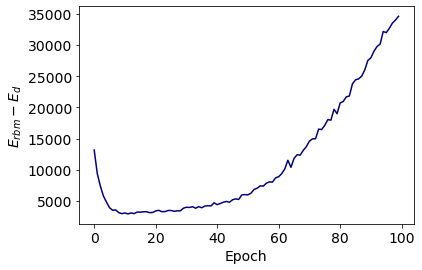

In [15]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_rbm_AR-E_d_AR, label='difference', color='navy')
ax.set_xlabel('Epoch')
ax.set_ylabel('$E_{rbm}-E_{d}$')

Text(0, 0.5, '$E_{rbm}-E_{d}$')

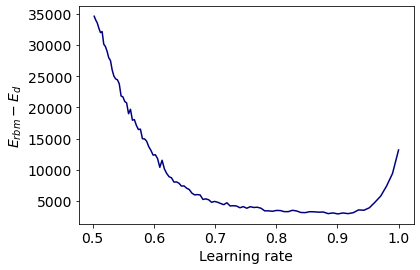

In [16]:
fig, ax = plt.subplots()
ax.plot(l_tot, E_rbm_AR-E_d_AR, label='difference', color='navy')
ax.set_xlabel('Learning rate')
ax.set_ylabel('$E_{rbm}-E_{d}$')

## Second momentum


Text(0, 0.5, '$\\epsilon ^{(2)}$')

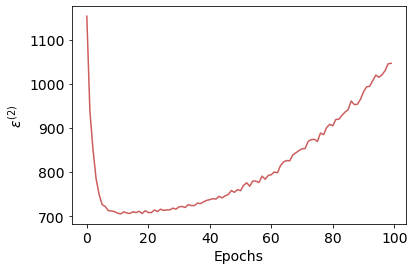

In [17]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), mom_AR, label='difference', color='indianred')
ax.set_xlabel('Epochs')
ax.set_ylabel('$\epsilon ^{(2)}$')

Text(0, 0.5, '$\\epsilon ^{(2)}$')

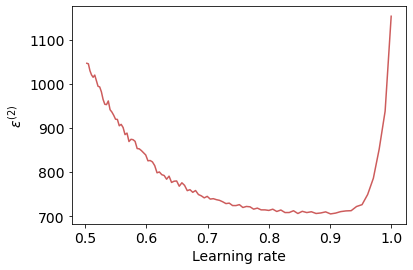

In [18]:
fig, ax = plt.subplots()
ax.plot(l_tot, mom_AR, label='difference', color='indianred')
ax.set_xlabel('Learning rate')
ax.set_ylabel('$\epsilon ^{(2)}$')

## ACCURACY

In [19]:
#Vf is a matrix composed by 10^4  sequences of lenght 20
#this function detects if a sequence is right or not
#right sequences [p-n-p-n-p] or [n-p-n-p-n]
#p=[01-00] or [10-00]
#n=[00-01] or [00-10]

def select_block_polar(Vf,r):      #This function selects only the FIRST half of the blocks  
    block_1 = Vf[r][0:2]
    block_2 = Vf[r][4:6]
    block_3 = Vf[r][8:10]
    block_4 = Vf[r][12:14]
    block_5= Vf[r][16:18]
    return (block_1,block_2,block_3,block_4,block_5)

def select_block_npolar(Vf,r):      #This function selects only the SECOND half of the blocks  
    block_1 = Vf[r][2:4] 
    block_2 = Vf[r][6:8]
    block_3 = Vf[r][10:12]
    block_4 = Vf[r][14:16]
    block_5= Vf[r][18:20]
    return (block_1,block_2,block_3,block_4,block_5)

def fracion_unlearned(Vf):
    
    C=0 #number of correctly learned sequences
    for r in range(0, Vf.shape[0]):
        block_1,block_2,block_3,block_4,block_5=select_block_polar(Vf,r)
        if (block_1== 1).sum() == 1 and (block_3== 1).sum() == 1 and (block_5== 1).sum() == 1: 
            if (block_2==1).sum() ==0 and (block_4==1).sum() ==0:
                C=C+1

    for r in range(0, Vf.shape[0]):
        block_1,block_2,block_3,block_4,block_5=select_block_npolar(Vf,r)
        if (block_1== 1).sum() == 1 and (block_3== 1).sum() == 1 and (block_5== 1).sum() == 1: 
            if (block_2==1).sum() ==0 and (block_4==1).sum() ==0:
                C=C+1
    
    R=(C/Vf.shape[0])*100
    print('The fraction of correct sequences in output of the RBM is: ', R , '%')
    print(C)
    
    return R

R = fracion_unlearned(Vf_AR) #THIS IS THE WAY TO COMPUTE THE FRACTION OF WRONG SAMPLES


The fraction of correct sequences in output of the RBM is:  1.97 %
197


# Optional 5. plot the weights 


Plot the weights wiμ of each hidden unit μ
in an A×G table, with a color map preserving the
rule that red means positive and blue
means negative weight

In [13]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)


w0= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a0= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b0= [0. 0.]
w= [[ 0.0227721   0.31377005]
 [-0

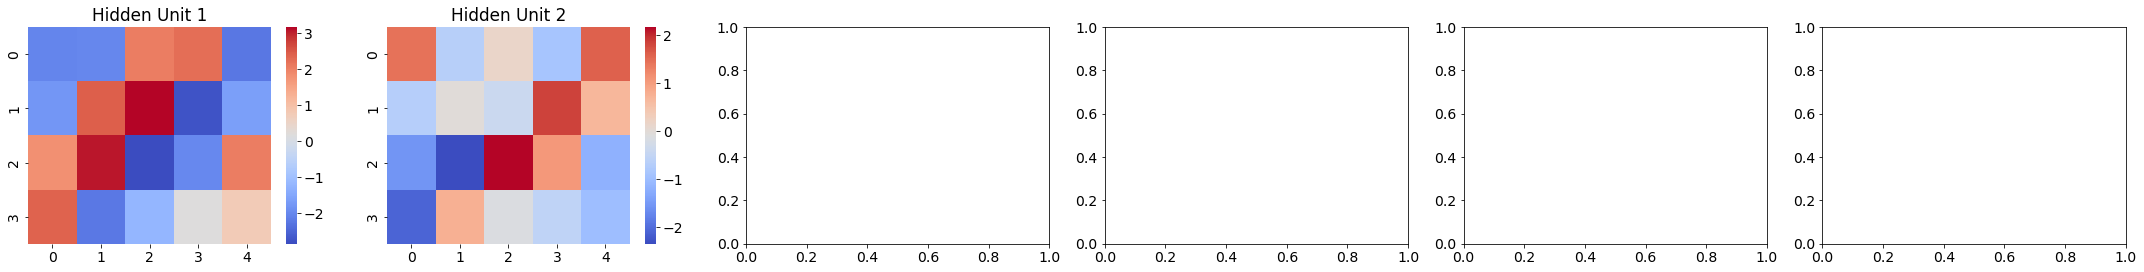

In [48]:
w1=[w[:,i].reshape(4,5) for i in range(M)]
import seaborn as sns

fig, axs = plt.subplots(ncols=6, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

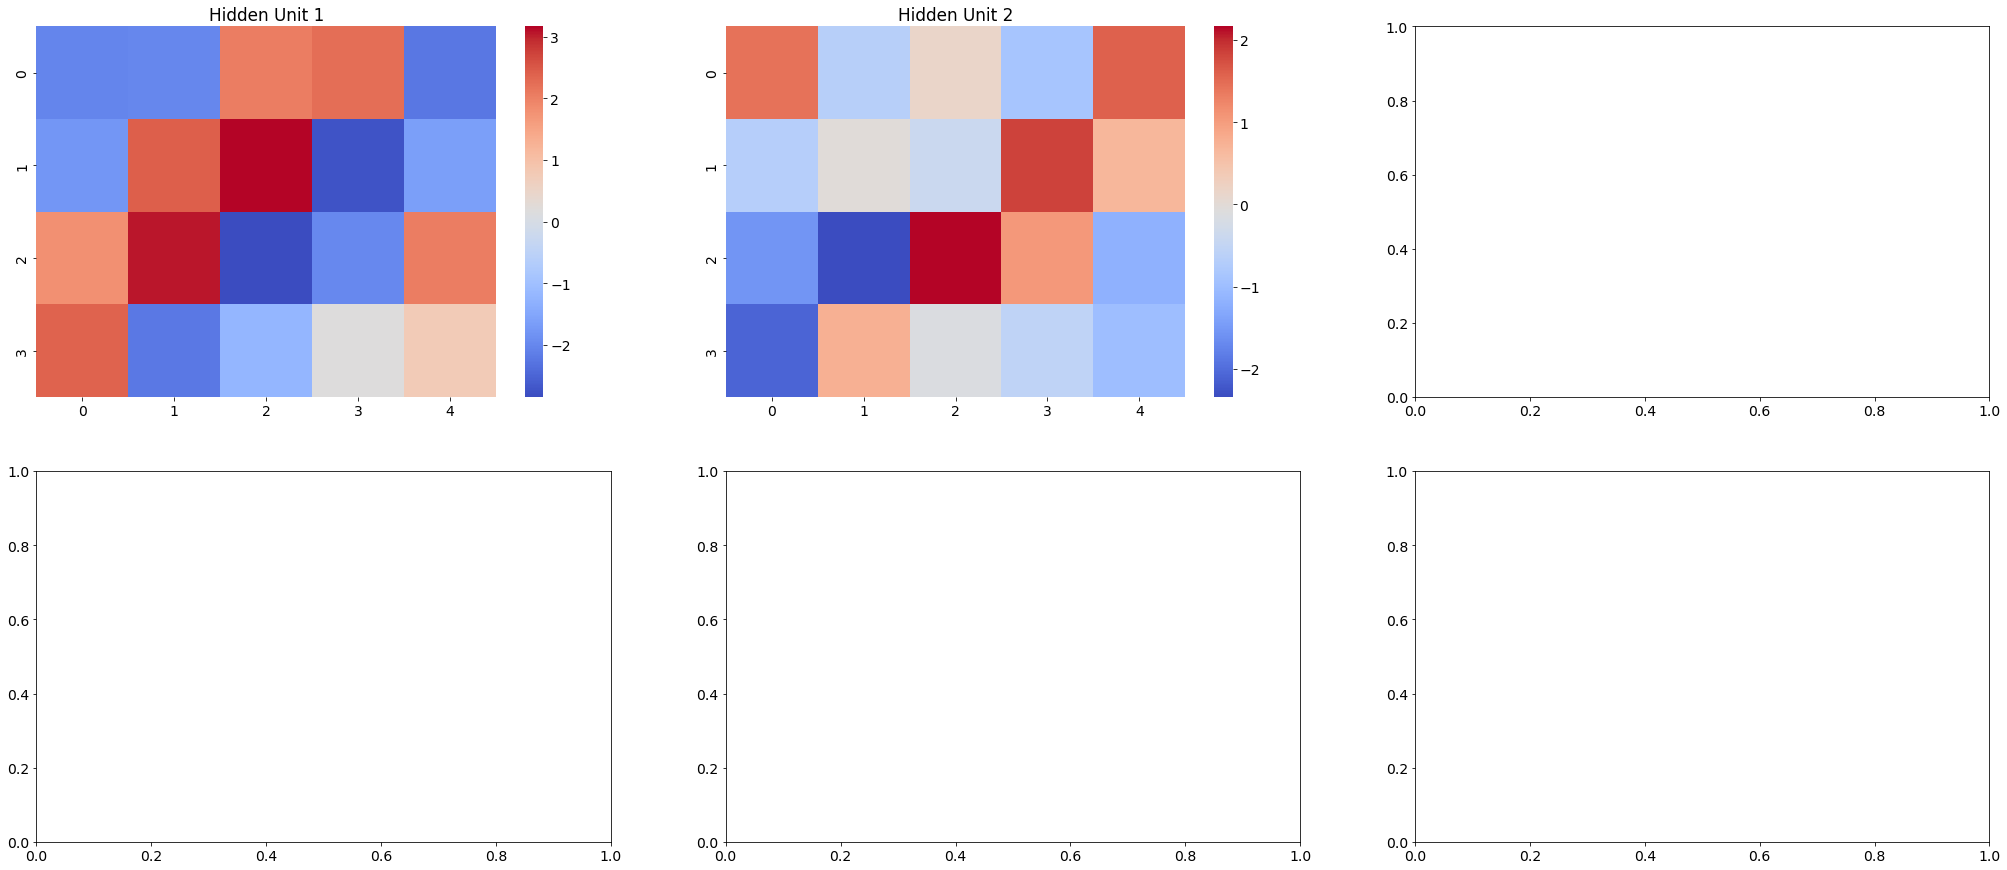

In [49]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()



In [ ]:
#FARE SIMULAZ CON DIVERSI OTTIMIZZATORI E PLOTTARE GLI INDICATORI INSIEME

# Training with just ADAM